# Hotel Booking Prediction

## Data Loading

In [1]:
from folium.plugins import HeatMap
import folium
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings.csv')

## Exploratory Data Analysis

In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.size

3820480

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [9]:
df.duplicated().sum()

31994

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.nunique()

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


In [12]:
# Finding % of each null values

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [13]:
# filling null values with zero

df.fillna(0, inplace = True)

In [14]:
# Removing rows with error

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [15]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Data Visualization

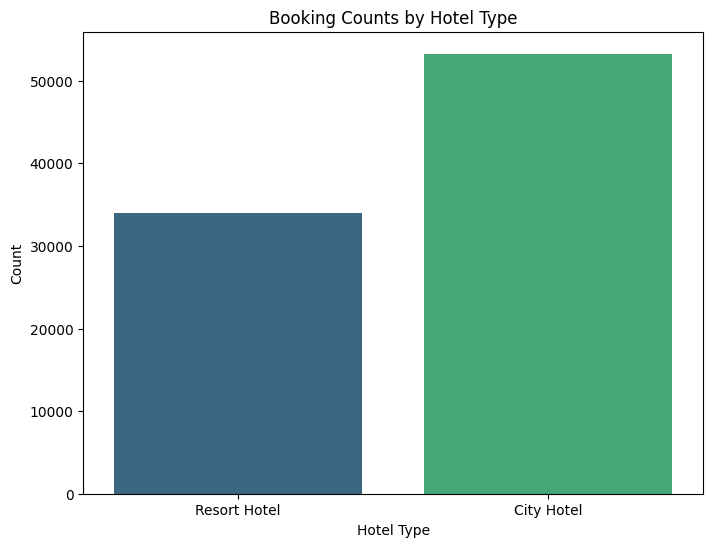

In [16]:
# Booking Counts by Hotel Type

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hotel', palette='viridis')
plt.title('Booking Counts by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

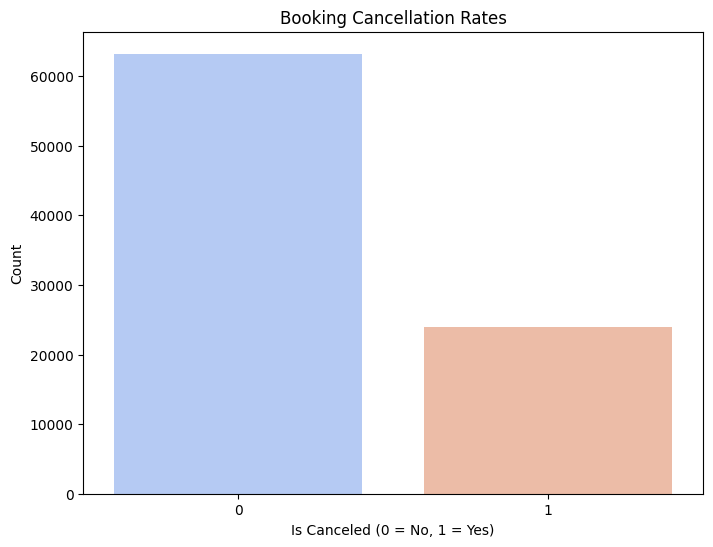

In [17]:
# Booking Cancellation Rates

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_canceled', palette='coolwarm')
plt.title('Booking Cancellation Rates')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

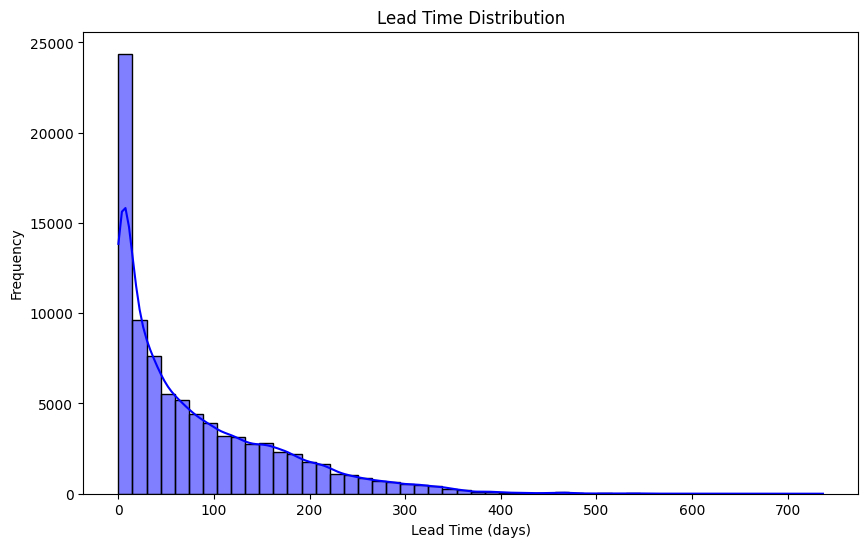

In [18]:
# Lead Time Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', kde=True, bins=50, color='blue')
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

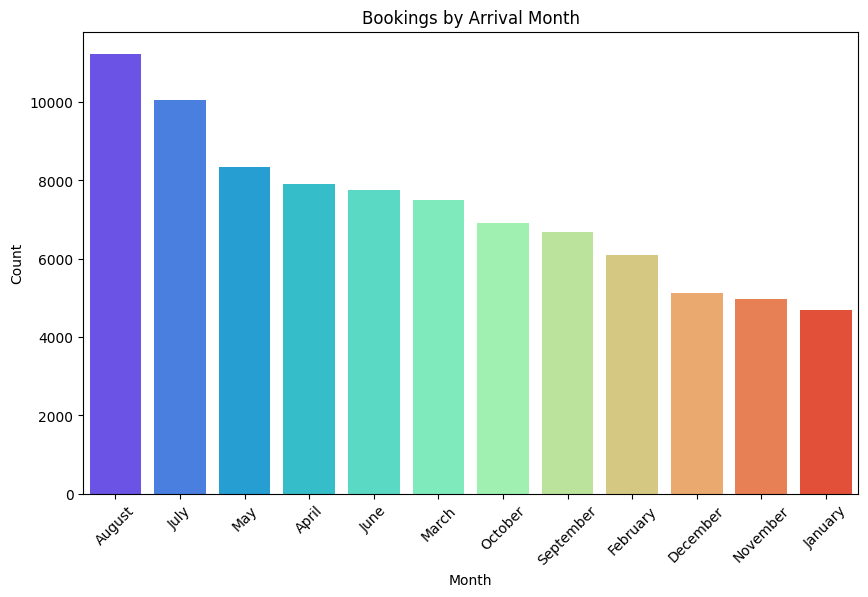

In [19]:
# Bookings by Arrival Month

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='arrival_date_month', palette='rainbow', order=df['arrival_date_month'].value_counts().index)
plt.title('Bookings by Arrival Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

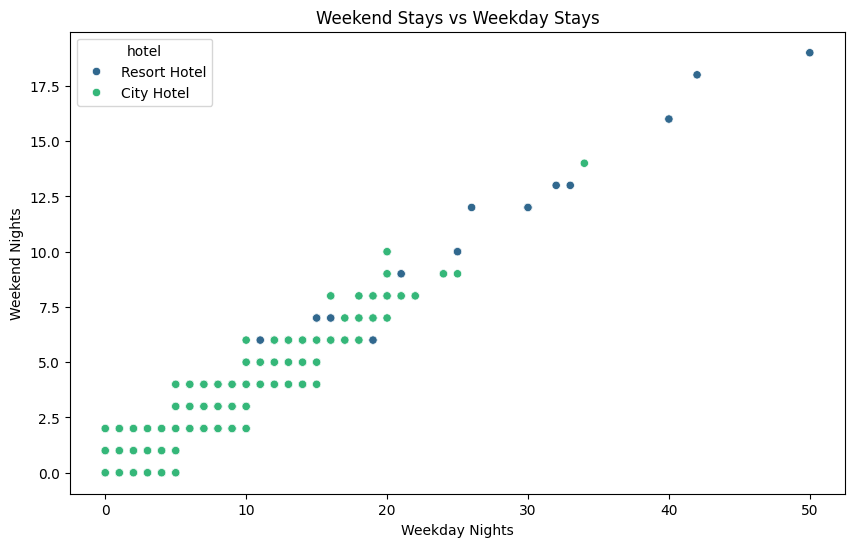

In [20]:
# Weekend Stays vs Weekday Stays

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stays_in_week_nights', y='stays_in_weekend_nights', hue='hotel', palette='viridis')
plt.title('Weekend Stays vs Weekday Stays')
plt.xlabel('Weekday Nights')
plt.ylabel('Weekend Nights')
plt.show()

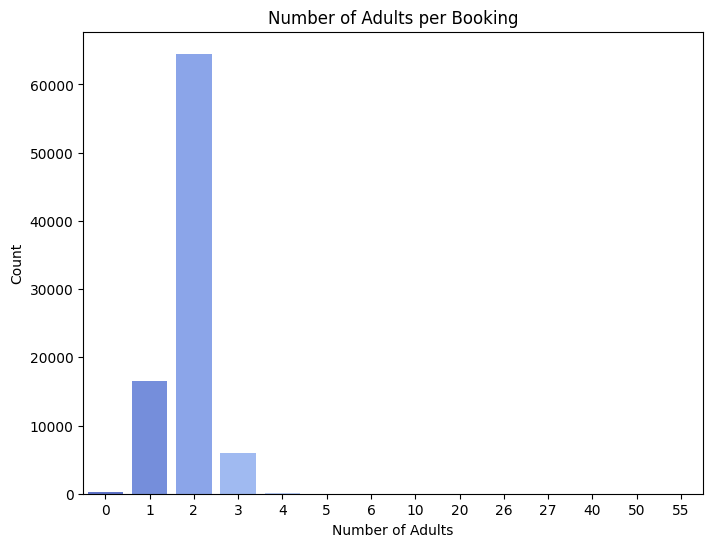

In [21]:
# Number of Adults per Booking

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='adults', palette='coolwarm')
plt.title('Number of Adults per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.show()

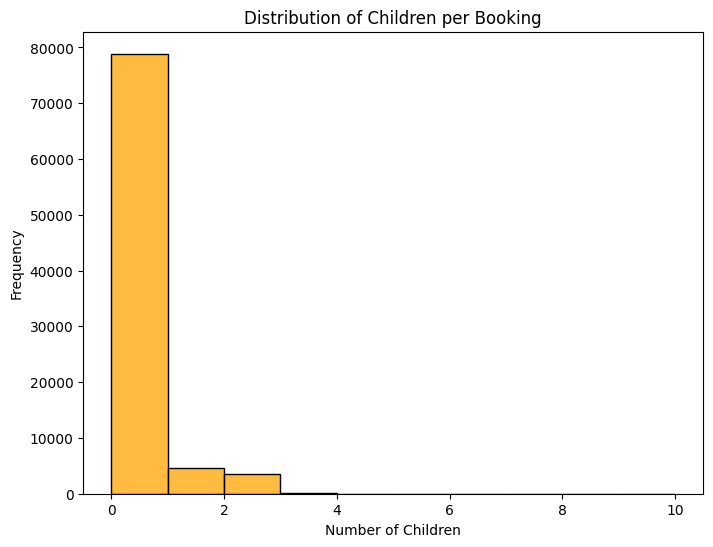

In [22]:
# Children Distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='children', kde=False, bins=10, color='orange')
plt.title('Distribution of Children per Booking')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

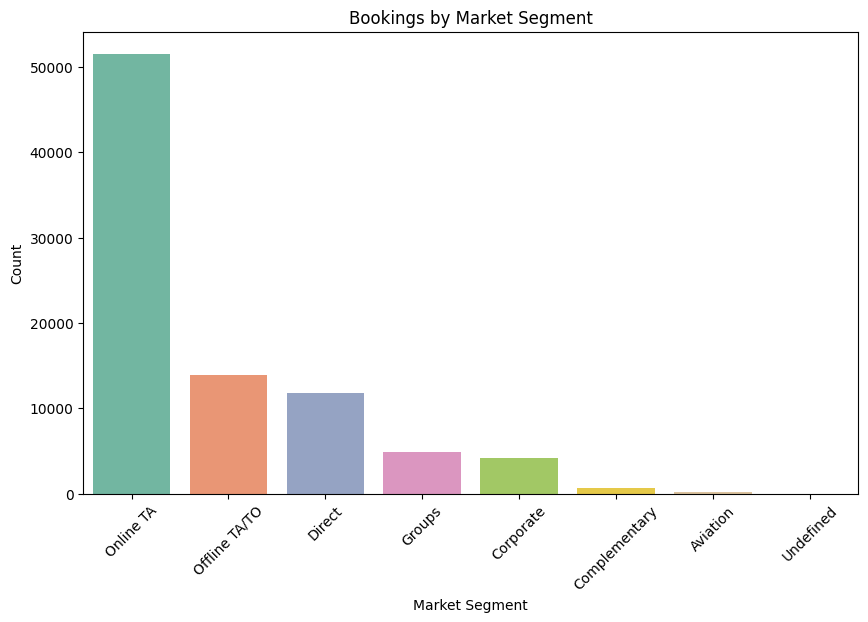

In [23]:
# Booking by Market Segment

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='market_segment', palette='Set2', order=df['market_segment'].value_counts().index)
plt.title('Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

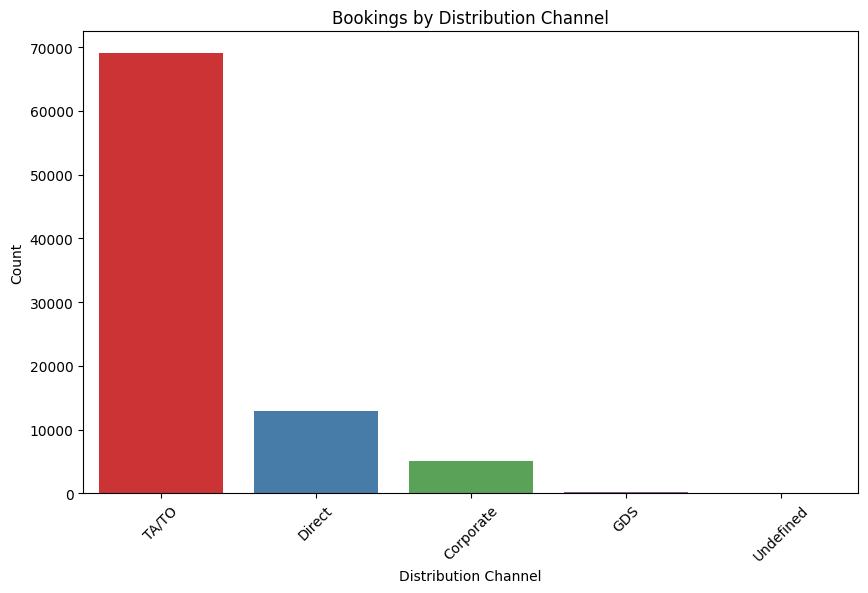

In [24]:
# Distribution Channel Analysis

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='distribution_channel', palette='Set1', order=df['distribution_channel'].value_counts().index)
plt.title('Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

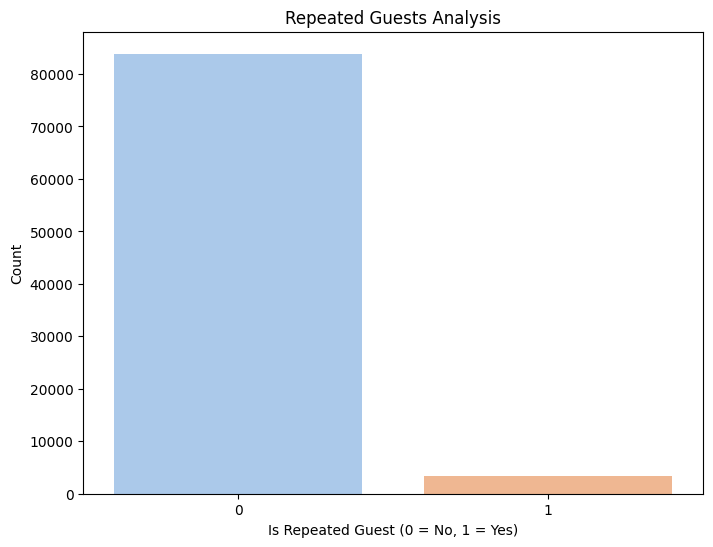

In [25]:
# Repeated Guests Analysis

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_repeated_guest', palette='pastel')
plt.title('Repeated Guests Analysis')
plt.xlabel('Is Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

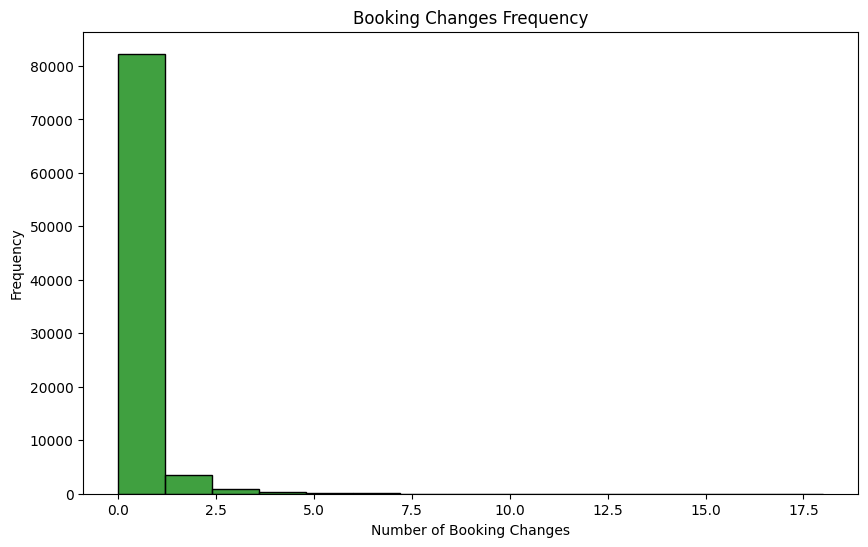

In [26]:
# Booking Changes Frequency

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='booking_changes', kde=False, bins=15, color='green')
plt.title('Booking Changes Frequency')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Frequency')
plt.show()

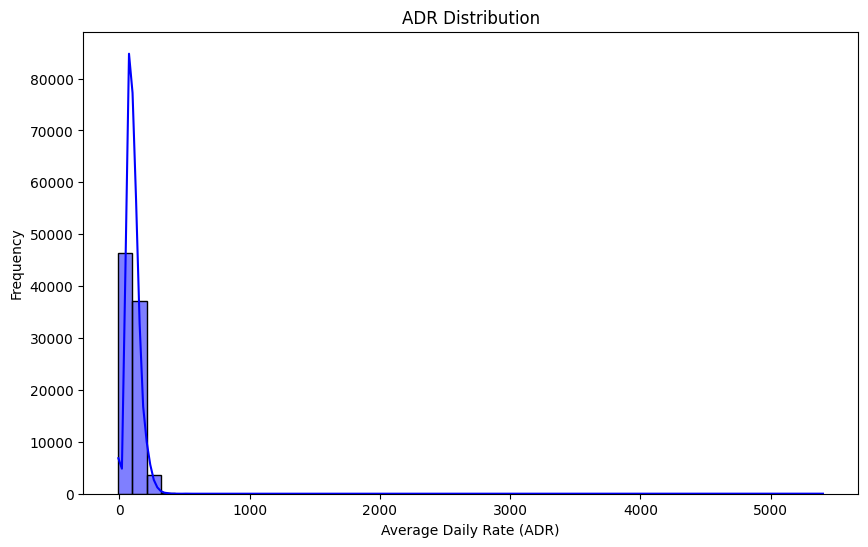

In [27]:
# ADR (Average Daily Rate) Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='adr', kde=True, color='blue', bins=50)
plt.title('ADR Distribution')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.show()

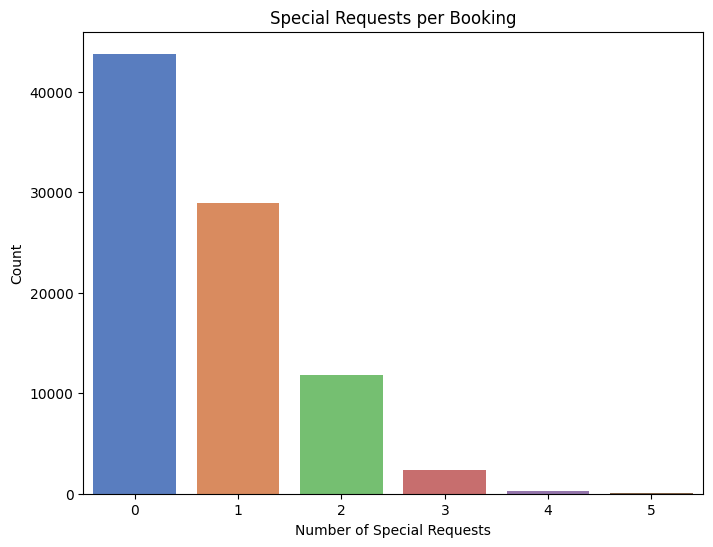

In [28]:
# Special Requests Distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='total_of_special_requests', palette='muted')
plt.title('Special Requests per Booking')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()

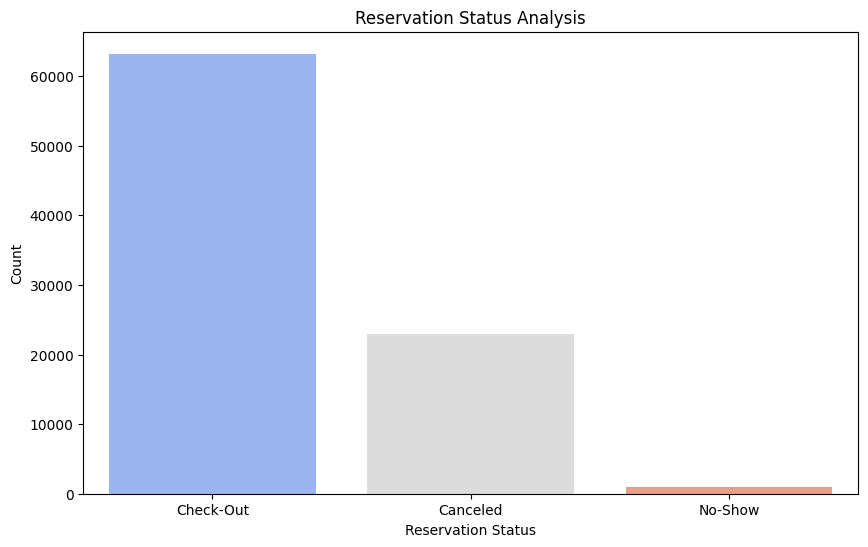

In [29]:
# Reservation Status Analysis

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='reservation_status', palette='coolwarm')
plt.title('Reservation Status Analysis')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.show()

In [30]:
# Country wise guest

country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [31]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

In [32]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

In [33]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [34]:
resort_hotel

,arrival_date_month,adr
0,April,76.841664
1,August,182.103524
2,December,64.072826
3,February,53.624311
4,January,48.599615
5,July,150.914540
6,June,109.026942
7,March,57.110018
8,May,77.725129
9,November,48.956548


In [35]:
city_hotel

,arrival_date_month,adr
0,April,114.251636
1,August,122.825388
2,December,90.769559
3,February,88.210810
4,January,83.378062
5,July,120.069489
6,June,120.673753
7,March,91.306933
8,May,124.825944
9,November,88.271089


In [36]:
# Price for each hotel with respect to months

import sort_dataframeby_monthorweek as sd

final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.599615,83.378062
1,February,53.624311,88.210810
2,March,57.110018,91.306933
3,April,76.841664,114.251636
4,May,77.725129,124.825944
5,June,109.026942,120.673753
6,July,150.914540,120.069489
7,August,182.103524,122.825388
8,September,98.855456,116.973279
9,October,62.634853,105.517410


In [37]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

In [38]:
# Most Busy Months

resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']

final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']

final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1687,1961
1,February,2053,2618
2,March,2191,3469
3,April,2169,3325
4,May,2246,3656
5,June,1926,3477
6,July,3013,3834
7,August,3153,4467
8,September,1875,3166
9,October,2209,3070


In [39]:
# Duration of guest stayed in the hotel

filter = df['is_canceled'] == 0
data = df[filter]

data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [40]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

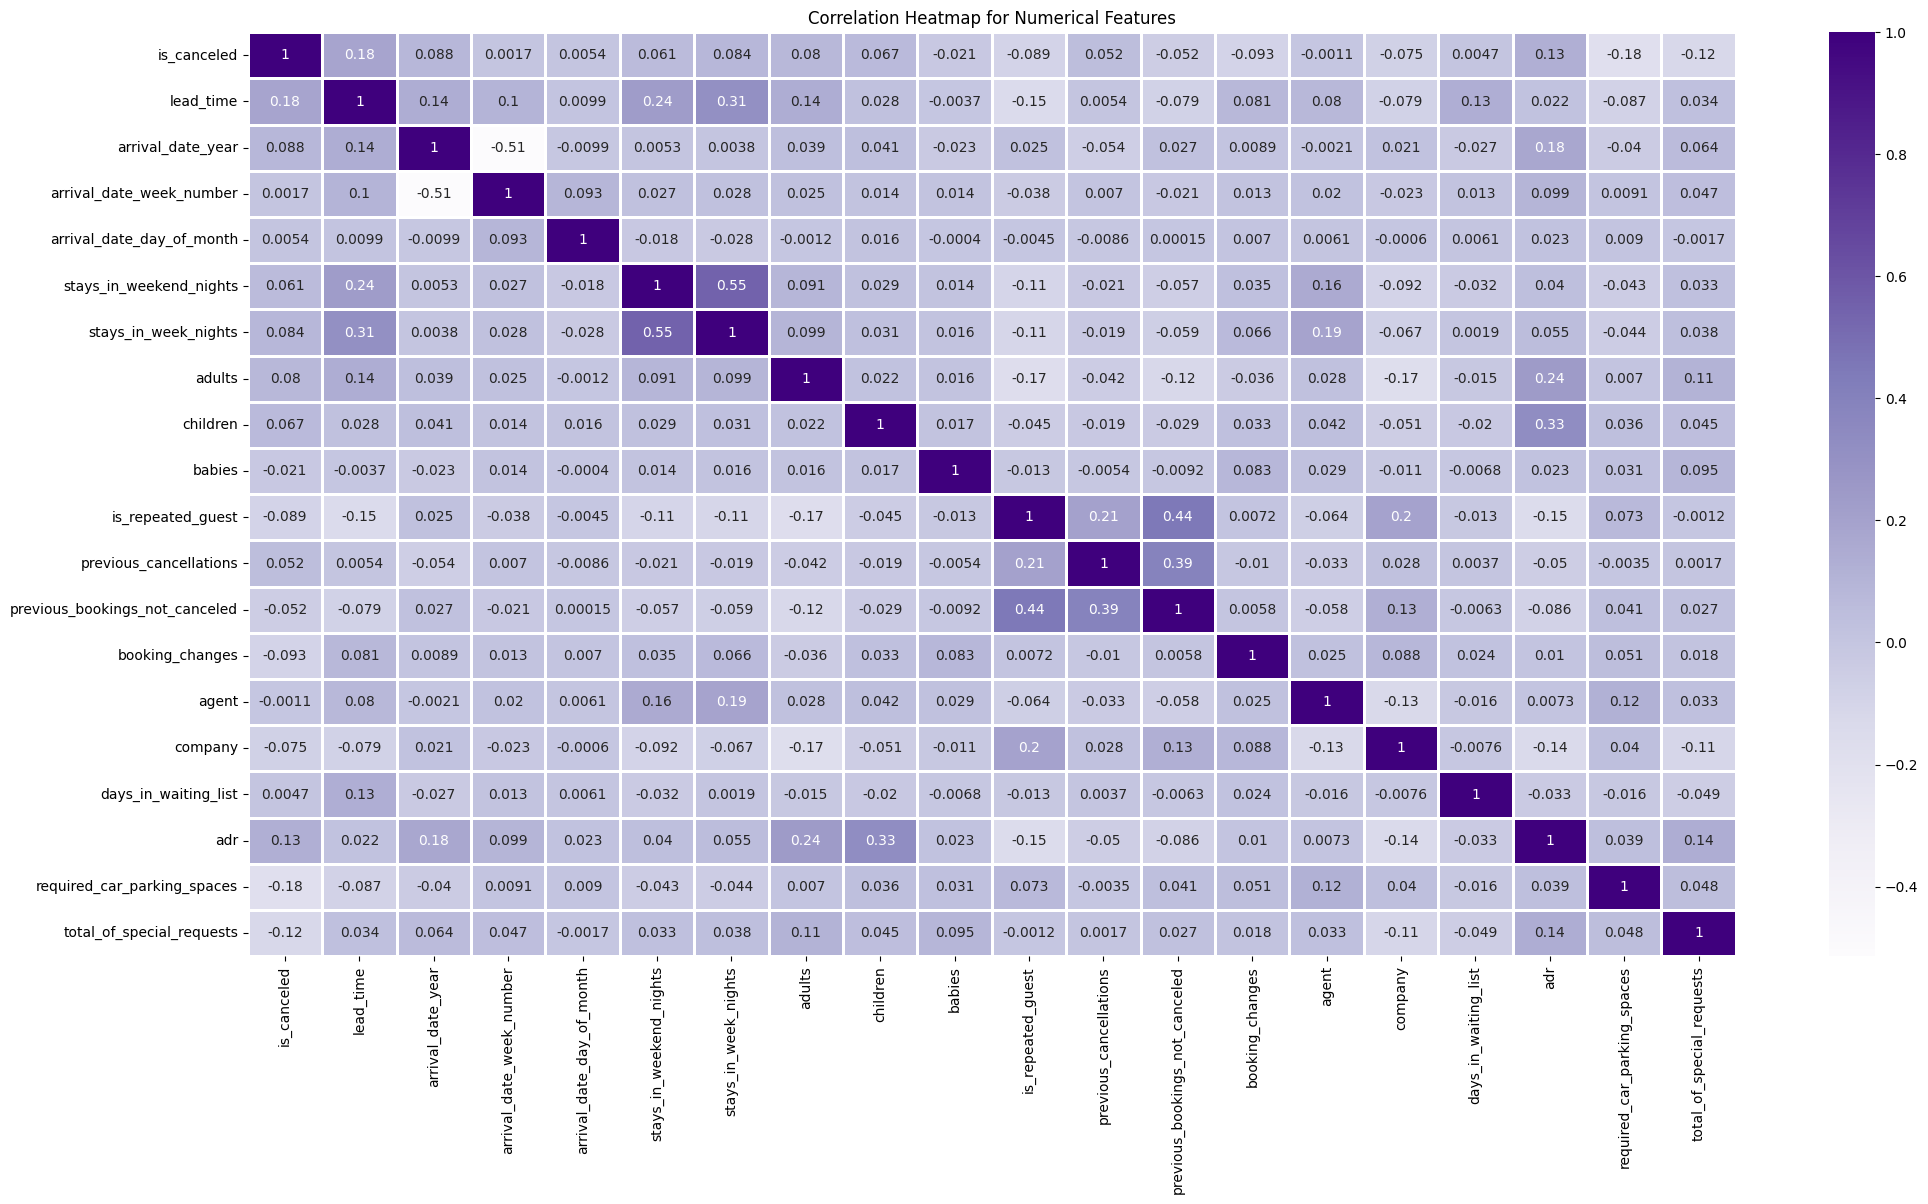

In [41]:
# Heatmap for Correlation Matrix

numerical_data = df.select_dtypes(include=['number'])
corr = numerical_data.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, cmap='Purples', linewidths=1)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

## Data Preprocessing

In [42]:
# Dropping unwanted columns

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [43]:
# Creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [44]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [45]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [46]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [47]:
# Encoding categorical data to numerical data

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})
cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [48]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [49]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [50]:
# Normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [51]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [52]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(df['is_canceled'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Model Training

In [54]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [55]:
model  = Sequential()

In [56]:
model.add(Dense(100, activation = 'relu', input_shape = (26, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           2,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 20)

Epoch 1/20
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7830 - loss: 0.4796 - val_accuracy: 0.8984 - val_loss: 0.2831
Epoch 2/20
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9080 - loss: 0.2528 - val_accuracy: 0.9447 - val_loss: 0.1814
Epoch 3/20
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9421 - loss: 0.1740 - val_accuracy: 0.9564 - val_loss: 0.1384
Epoch 4/20
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9568 - loss: 0.1335 - val_accuracy: 0.9653 - val_loss: 0.1117
Epoch 5/20
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9636 - loss: 0.1141 - val_accuracy: 0.9694 - val_loss: 0.0980
Epoch 6/20
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9668 - loss: 0.1042 - val_accuracy: 0.9692 - val_loss: 0.0932
Epoch 7/20
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9734 - loss: 0.0861 - val_accuracy: 0.9748 - val_loss: 0.0970
Epoch 8/20
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9743 - loss: 0.0819 -

## Model Evaluation

In [65]:
plt.figure(figsize = (12, 6))
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 21)
loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>

In [66]:
plt.figure(figsize = (12, 6))
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoch = range(1, 21)
accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})
px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>